In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [13]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


<AxesSubplot:>

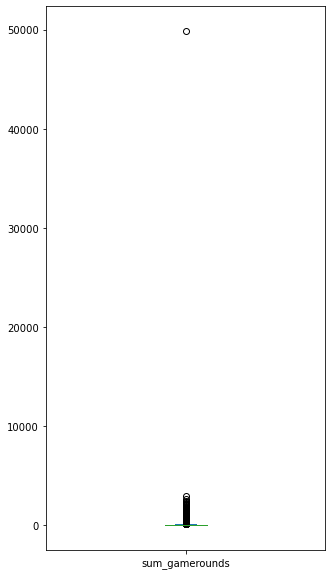

In [21]:
df['sum_gamerounds'].plot.box(figsize=(5,10))

In [24]:
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [25]:
plot_df=df.groupby('sum_gamerounds').count()['userid']
plot_df

sum_gamerounds
0        3994
1        5538
2        4606
3        3958
4        3629
         ... 
2294        1
2438        1
2640        1
2961        1
49854       1
Name: userid, Length: 942, dtype: int64

Text(0, 0.5, 'Number of Players')

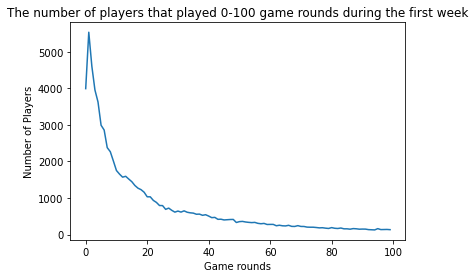

In [26]:
ax=plot_df[:100].plot()
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_xlabel('Game rounds')
ax.set_ylabel("Number of Players")

In [58]:
df['retention_1'].sum()/df['retention_1'].count()

0.4452095044850259

In [60]:
df['retention_1'].mean()

0.4452095044850259

In [28]:
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

<AxesSubplot:ylabel='Density'>

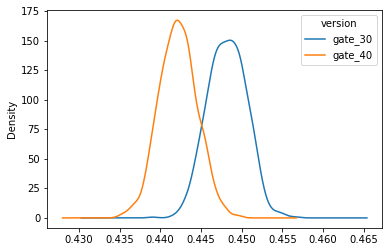

In [6]:
boot_1d = []
for i in range(1000):
    boot_mean = df.sample(frac = 1,replace = True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density')

In [31]:
boot_1d

version,gate_30,gate_40
retention_1,0.449265,0.443558
retention_1,0.444140,0.439194
retention_1,0.447848,0.440684
retention_1,0.448094,0.443561
retention_1,0.445184,0.446050
...,...,...
retention_1,0.447520,0.442207
retention_1,0.450408,0.443086
retention_1,0.451766,0.444469
retention_1,0.446885,0.443754


Probability that 1-day retention is greater when the gate is at level 30: 0.966


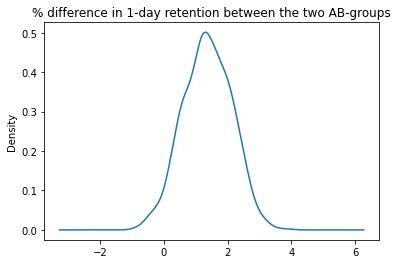

In [32]:
boot_1d['diff'] = (boot_1d.gate_30 - boot_1d.gate_40)/boot_1d.gate_40*100
ax = boot_1d['diff'].plot(kind='density')
ax.set_title('% difference in 1-day retention between the two AB-groups')
print('Probability that 1-day retention is greater when the gate is at level 30:',(boot_1d['diff'] > 0).mean())

In [33]:
df['retention_7'].sum()/df['retention_7'].count()

0.1860648194347426

In [34]:
df.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

<AxesSubplot:ylabel='Density'>

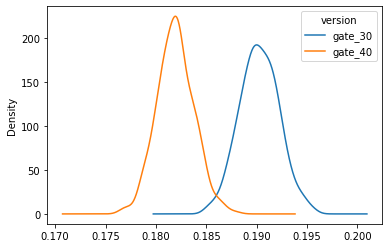

In [38]:
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac = 1,replace = True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
boot_7d = pd.DataFrame(boot_7d)
boot_7d.plot(kind='density')

Probability that 7-day retention is greater when the gate is at level 30: 0.996


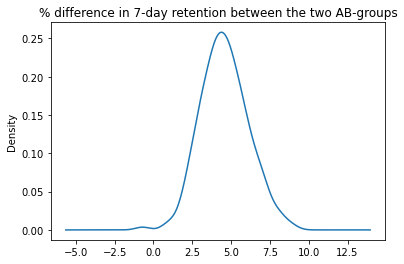

In [39]:
boot_7d['diff'] = (boot_7d.gate_30 - boot_7d.gate_40)/boot_7d.gate_40*100
ax = boot_7d['diff'].plot(kind='density')
ax.set_title('% difference in 7-day retention between the two AB-groups')
print('Probability that 7-day retention is greater when the gate is at level 30:',(boot_7d['diff'] > 0).mean())

In [41]:
#df['is_outlier'] = df[f'{column}'].apply(lambda x: 1 if x > 30 else 0) what is it for?
#1_d:0.966;7_d:0.996

## Z-test in Statsmodels
null:  pnew  -  pold  <=0

alternative:  pnew  -  pold  >0

In [54]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [85]:
df.groupby('version').mean()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,4.987564e+06,52.456264,0.448188,0.190201
gate_40,5.009073e+06,51.298776,0.442283,0.182000


In [92]:
retention_1d_old=df.groupby('version').sum()['retention_1'].loc['gate_30']
retention_1d_new=df.groupby('version').sum()['retention_1'].loc['gate_40']
n_1d_old=df.groupby('version').count()['retention_1'].loc['gate_30']
n_1d_new=df.groupby('version').count()['retention_1'].loc['gate_40']
retention_1d_old,retention_1d_new,n_1d_old,n_1d_new

(20034, 20119, 44700, 45489)

In [72]:
import statsmodels.api as sm

In [97]:
z_score, p_value = sm.stats.proportions_ztest([retention_1d_new,retention_1d_old],[n_1d_new,n_1d_old],alternative='larger')
z_score, p_value

(-1.7840862247974725, 0.9627951723515404)

In [81]:
retention_7d_old=df.groupby('version').sum()['retention_7'].loc['gate_30']
retention_7d_new=df.groupby('version').sum()['retention_7'].loc['gate_40']
n_7d_old=df.groupby('version').count()['retention_7'].loc['gate_30']
n_7d_new=df.groupby('version').count()['retention_7'].loc['gate_40']
retention_7d_old,retention_7d_new,n_7d_old,n_7d_new

(8502, 8279, 44700, 45489)

In [82]:
import statsmodels.api as sm

In [83]:
z_score, p_value = sm.stats.proportions_ztest([retention_7d_new, retention_7d_old], [n_7d_new, n_7d_old], alternative='larger')
z_score, p_value

(-3.164358912748191, 0.9992228750121929)

In [ ]:
##1_d:0.963;7_d:0.999

## Z-test

In [61]:
def z_test(p1,p0,n1,n0):
    delta = p1-p0
    p = (p1*n1 + p0*n0) / (n1+n0)
    return delta / np.sqrt(p*(1-p)*(1/n1 + 1/n0))

In [62]:
p1 = retention_1d_new / n_1d_new
p0 = retention_1d_old / n_1d_old
n1 = n_1d_new
n0 = n_1d_old

In [98]:
z_value = z_test(p1,p0,n1,n0)
z_value

-1.7840862247974725

In [99]:
from scipy.stats import norm
p_value = 1- norm.cdf(z_value)

p_value

0.9627951723515404

In [100]:
p1 = retention_7d_new / n_7d_new
p0 = retention_7d_old / n_7d_old
n1 = n_7d_new
n0 = n_7d_old

In [101]:
z_value = z_test(p1,p0,n1,n0)
z_value

-3.164358912748191

In [102]:
from scipy.stats import norm
p_value = 1- norm.cdf(z_value)

p_value

0.9992228750121929

In [129]:
##1_d:0.963;7_d:0.999

## EDA

In [35]:
df_30=df[df['sum_gamerounds']<30].groupby('version')[['retention_1','retention_7']].mean()
df_50=df[(df['sum_gamerounds']>=30)&(df['sum_gamerounds']<51)].groupby('version')[['retention_1','retention_7']].mean()
df_51=df[df['sum_gamerounds']>=51].groupby('version')[['retention_1','retention_7']].mean()
df_30['round']=30
df_50['round']=50
df_51['round']=51
df_combine=pd.concat([df_30,df_50,df_51], ignore_index=True)
df_combine

,retention_1,retention_7,round
0,0.238661,0.042576,30
1,0.235420,0.039306,30
2,0.678986,0.187862,50
3,0.685639,0.176018,50
4,0.861440,0.563129,51
5,0.850976,0.537427,51


<AxesSubplot:xlabel='round', ylabel='retention_1'>

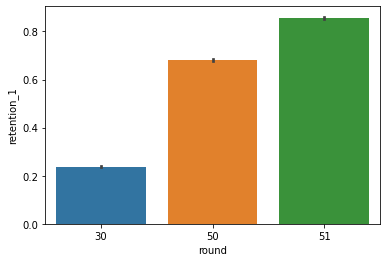

In [32]:
sns.barplot(x='round',y='retention_1',data=df_combine)

<AxesSubplot:xlabel='round', ylabel='retention_7'>

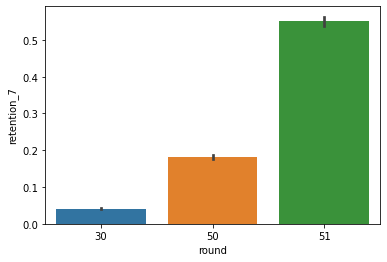

In [33]:
sns.barplot(x='round',y='retention_7',data=df_combine)

<AxesSubplot:>

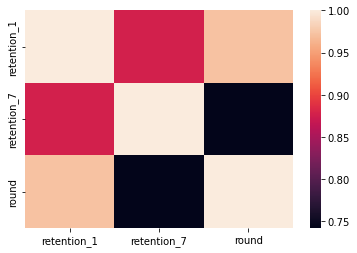

In [19]:
sns.heatmap(df_combine.corr())

C:\Users\ruize\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='retention_1', ylabel='Density'>

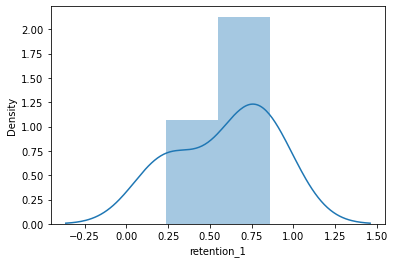

In [29]:
sns.distplot(df_combine['retention_1'])

C:\Users\ruize\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='retention_7', ylabel='Density'>

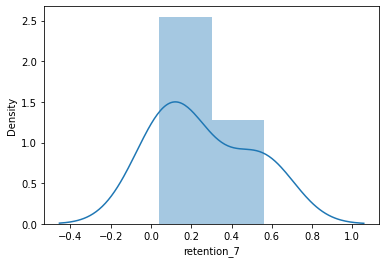

In [30]:
sns.distplot(df_combine['retention_7'])